<a href="https://colab.research.google.com/github/lazarussim12-beep/DLI_GRP_Assignment/blob/Ahmed/Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and import all required library


In [1]:
# ===== STANDARD LIBRARIES =====
import os
import re
import time
import random
import zipfile
from typing import Tuple

# ===== NUMERIC & DATA PROCESSING =====
import numpy as np
import pandas as pd

# ===== MACHINE LEARNING =====
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay,
    classification_report, roc_curve, precision_recall_curve, auc
)
from sklearn.svm import SVC

# ===== BOOSTING LIBRARIES =====
import xgboost as xgb
import lightgbm as lgb

# ===== TENSORFLOW / KERAS =====
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Embedding, Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D,
    Dense, Dropout, LSTM, Bidirectional, Input, GRU
)
from tensorflow.keras.optimizers import Adam

# ===== VISUALIZATION =====
import matplotlib.pyplot as plt
from tabulate import tabulate

# ===== SAVING / LOADING =====
import pickle
import joblib


# Import Dataset


--2025-08-24 00:36:52--  https://github.com/lazarussim12-beep/DLI_GRP_Assignment/raw/ecfaa17f2bf89a0e65e30e678d9dc03715c4e8d5/enron_spam_data.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lazarussim12-beep/DLI_GRP_Assignment/ecfaa17f2bf89a0e65e30e678d9dc03715c4e8d5/enron_spam_data.zip [following]
--2025-08-24 00:36:52--  https://raw.githubusercontent.com/lazarussim12-beep/DLI_GRP_Assignment/ecfaa17f2bf89a0e65e30e678d9dc03715c4e8d5/enron_spam_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15642124 (15M) [application/zip]
Saving to: ‘enron_spam_data.zip’

enron_spam_data.zip 100%[=

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14



Null values per column:
Message ID      0
Subject       289
Message       371
Spam/Ham        0
Date            0
dtype: int64

Using 'Spam/Ham' as target column
Unique values: ['ham' 'spam']
Value counts:
Spam/Ham
spam    17171
ham     16545
Name: count, dtype: int64


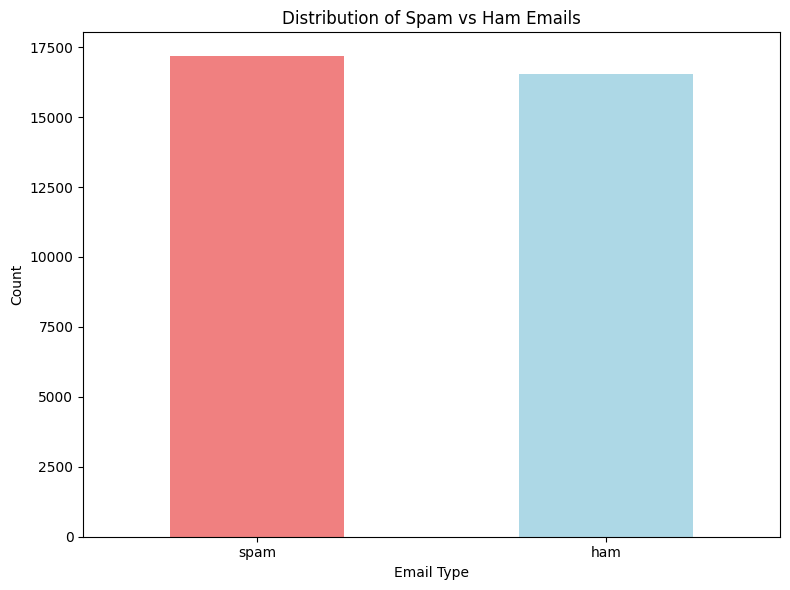

In [2]:
# Download the zip file from GitHub
!wget https://github.com/lazarussim12-beep/DLI_GRP_Assignment/raw/ecfaa17f2bf89a0e65e30e678d9dc03715c4e8d5/enron_spam_data.zip

# Unzip the file
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt

with zipfile.ZipFile('enron_spam_data.zip', 'r') as zip_ref:
    zip_ref.extractall('enron_data')

# List extracted files (to verify)
extracted_files = os.listdir('enron_data')
print("Extracted files:", extracted_files)

# Initialize df as None
df = None

# Load the CSV file(s) into pandas - with better error handling
for file in extracted_files:
    if file.endswith('.csv'):
        file_path = f'enron_data/{file}'
        print(f"\nTrying to load: {file_path}")

        try:
            # Try different encoding options and parameters
            for encoding in ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']:
                try:
                    df = pd.read_csv(file_path, encoding=encoding)
                    print(f"✅ Successfully loaded {file} with {encoding} encoding")
                    print(f"Shape: {df.shape}")
                    break
                except UnicodeDecodeError:
                    print(f"❌ Failed with {encoding} encoding, trying next...")
                    continue
                except Exception as e:
                    print(f"❌ Error with {encoding}: {e}")
                    continue

            # If still None, try with different separators
            if df is None or len(df) == 0:
                print("Trying different separators...")
                for sep in [',', ';', '\t', '|']:
                    try:
                        df = pd.read_csv(file_path, encoding='utf-8', sep=sep)
                        if len(df) > 0:
                            print(f"✅ Success with separator '{sep}'")
                            break
                    except:
                        continue

            # If we got data, break out of the file loop
            if df is not None and len(df) > 0:
                print(f"Final loaded shape: {df.shape}")
                break

        except Exception as e:
            print(f"❌ Error loading {file}: {e}")
            continue

# Check if we successfully loaded data
if df is None or len(df) == 0:
    print("❌ CRITICAL ERROR: No data was loaded!")
    print("Let's try alternative loading methods...")

    # Try loading with different methods
    for file in extracted_files:
        if file.endswith('.csv'):
            file_path = f'enron_data/{file}'
            print(f"\nAlternative method for: {file_path}")

            # Check file size
            file_size = os.path.getsize(file_path)
            print(f"File size: {file_size} bytes")

            # Read first few lines manually
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                lines = f.readlines()[:10]
                print("First 10 lines:")
                for i, line in enumerate(lines):
                    print(f"{i+1}: {line.strip()}")

            # Try pandas with no header
            try:
                df = pd.read_csv(file_path, header=None, encoding='utf-8')
                if len(df) > 0:
                    print(f"✅ Loaded without header: {df.shape}")
                    # Assign column names manually if needed
                    if df.shape[1] >= 4:
                        df.columns = ['Message ID', 'Subject', 'Message', 'Spam/Ham'] + [f'Col_{i}' for i in range(4, df.shape[1])]
                    break
            except Exception as e:
                print(f"No header method failed: {e}")
else:
    print(f"✅ Successfully loaded data!")

# Display information about the loaded data
if df is not None and len(df) > 0:
    print(f"\n=== DATASET INFO ===")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"Data types:\n{df.dtypes}")
    print(f"\nFirst few rows:")
    display(df.head())

    print(f"\nNull values per column:")
    print(df.isnull().sum())

    # Find the spam/ham column
    spam_col = None
    for col in df.columns:
        unique_vals = df[col].unique()
        if len(unique_vals) == 2 and any(str(val).lower() in ['spam', 'ham', '0', '1'] for val in unique_vals):
            spam_col = col
            break

    if spam_col:
        print(f"\nUsing '{spam_col}' as target column")
        print(f"Unique values: {df[spam_col].unique()}")
        print(f"Value counts:")
        print(df[spam_col].value_counts())

        # Visualization
        try:
            plt.figure(figsize=(8, 6))
            df[spam_col].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
            plt.title('Distribution of Spam vs Ham Emails')
            plt.xlabel('Email Type')
            plt.ylabel('Count')
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Visualization error: {e}")
    else:
        print("\n⚠️ Could not identify spam/ham column automatically")
        print("Available columns and their unique values:")
        for col in df.columns:
            unique_vals = df[col].unique()[:5]  # First 5 unique values
            print(f"  {col}: {unique_vals}")
else:
    print("\n❌ FINAL ERROR: Could not load any data!")
    print("Please check:")
    print("1. The download URL is correct")
    print("2. The zip file contains CSV files")
    print("3. The CSV files are not corrupted")
    print("4. You have sufficient disk space")

# Clear PKL


In [3]:


# Remove old results to avoid duplication/overwrite
if os.path.exists("all_models_results.pkl"):
    os.remove("all_models_results.pkl")
    print("✅ Cleared previous results.")
else:
    print("No previous results found, starting fresh.")


No previous results found, starting fresh.


# Lazarus Sim Wen Hui Code


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


759/759 - 54s - 71ms/step - accuracy: 0.9256 - loss: 0.1696 - val_accuracy: 0.9759 - val_loss: 0.0645
Epoch 2/5
759/759 - 82s - 108ms/step - accuracy: 0.9843 - loss: 0.0477 - val_accuracy: 0.9792 - val_loss: 0.0563
Epoch 3/5
759/759 - 80s - 106ms/step - accuracy: 0.9919 - loss: 0.0250 - val_accuracy: 0.9770 - val_loss: 0.0835
Epoch 4/5
759/759 - 83s - 110ms/step - accuracy: 0.9927 - loss: 0.0212 - val_accuracy: 0.9785 - val_loss: 0.0828
Epoch 5/5
759/759 - 82s - 108ms/step - accuracy: 0.9939 - loss: 0.0169 - val_accuracy: 0.9789 - val_loss: 0.0791


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:10:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 13736, number of negative: 13236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 7.340286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 917311
[LightGBM] [Info] Number of data points in the train set: 26972, number of used features: 9970
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509269 -> initscore=0.037080
[LightGBM] [Info] Start training from score 0.037080


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



MODEL EVALUATION TABLE (THRESH=0.5): Accuracy, Precision, Recall, F1, ROC-AUC, Params/Size, Inference time (ms)
+------------------------------------+-------+--------+-------+-------+-------+---------------------------+------------------+
| Model                              |   Acc |   Prec |   Rec |    F1 |   AUC | Size/Params               |   Inference (ms) |
+====================================+=======+========+=======+=======+=======+===========================+==================+
| Logistic Regression (TF-IDF)       | 0.986 |  0.979 | 0.994 | 0.986 | 0.998 | params=10,001             |            2.900 |
+------------------------------------+-------+--------+-------+-------+-------+---------------------------+------------------+
| Logistic Regression (CNN-features) | 0.981 |  0.976 | 0.988 | 0.982 | 0.998 | params=65                 |            1.330 |
+------------------------------------+-------+--------+-------+-------+-------+---------------------------+------------------

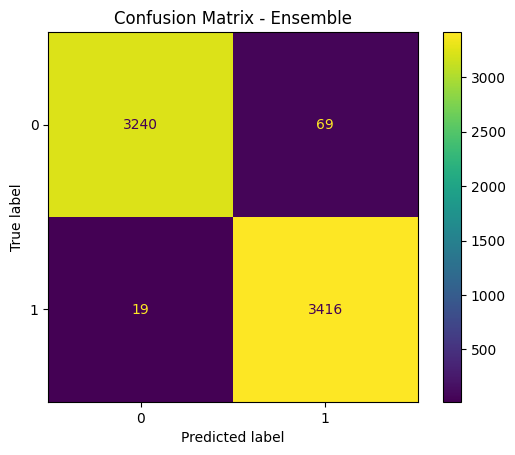

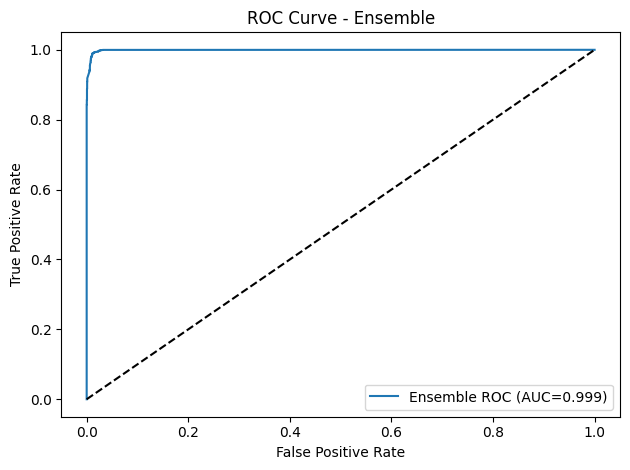

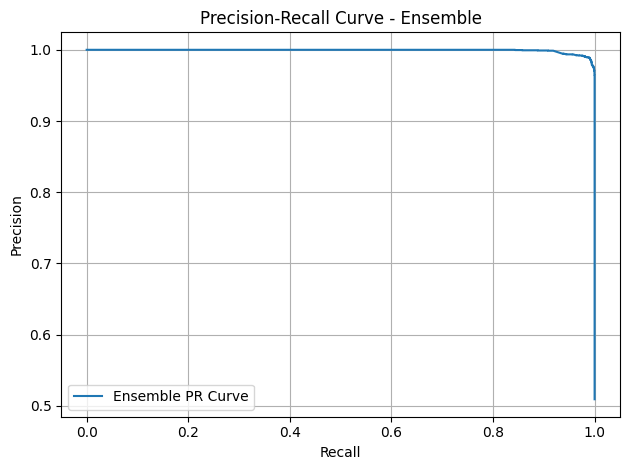


Total runtime: 665.32 seconds (11 minutes 5.32 seconds)
Achieved F1 (Ensemble) = 0.99. Target met
✅ Stored results for Lazarus_Ensemble


In [ ]:
start_time = time.time()

#LAZMODEL
# === Reproducibility: fix random seeds ===
os.environ['PYTHONHASHSEED'] = '42'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Basic cleaning
df['Message'] = (
    df['Message']
    .astype(str)
    .str.lower()
    .apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
)
df['Spam/Ham'] = df['Spam/Ham'].map({'ham': 0, 'spam': 1})

X = df['Message'].values
y = df['Spam/Ham'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Tokenization and padding for CNN branch ===
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq  = pad_sequences(tokenizer.texts_to_sequences(X_test),  maxlen=max_len)

# === CNN feature extractor model ===
cnn_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    Dropout(0.3),
    Conv1D(64, 3, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# === Helpers: timing and size reporting ===
def time_fit_keras(model, X, y, **fit_kwargs):
    t0 = time.time()
    history = model.fit(X, y, **fit_kwargs)
    ms = (time.time() - t0) * 1000
    return history, ms

def time_fit_sklearn(model, X, y):
    t0 = time.time()
    model.fit(X, y)
    ms = (time.time() - t0) * 1000
    return model, ms

def measure_inference_time(model, X_test_data, model_type='sklearn'):
    t0 = time.time()
    if model_type == 'sklearn':
        _ = model.predict(X_test_data)
    elif model_type == 'keras':
        _ = model.predict(X_test_data, verbose=0)
    return (time.time() - t0) * 1000

def logreg_param_count(lr_model):
    return lr_model.coef_.size + lr_model.intercept_.size

def keras_param_count(model):
    return model.count_params()

def xgb_complexity(xgb_model):
    # Trees + depth proxy
    n_trees = xgb_model.get_booster().num_boosted_rounds()
    max_depth = xgb_model.get_params().get('max_depth', None)
    return f"trees={n_trees}, max_depth={max_depth}"

def lgb_complexity(lgb_model):
    n_trees = lgb_model.get_params().get('n_estimators', getattr(lgb_model, 'n_estimators', None))
    num_leaves = lgb_model.get_params().get('num_leaves', getattr(lgb_model, 'num_leaves', None))
    return f"trees={n_trees}, num_leaves={num_leaves}"

# === Train CNN ===
cnn_history, cnn_train_ms = time_fit_keras(
    cnn_model, X_train_seq, y_train,
    batch_size=32, epochs=5, validation_split=0.1, verbose=2
)
cnn_infer_ms = measure_inference_time(cnn_model, X_test_seq, 'keras')
cnn_total_params = keras_param_count(cnn_model)

# === Extract CNN features (output from GlobalMaxPooling1D layer) ===
feature_extractor = Model(inputs=cnn_model.layers[0].input, outputs=cnn_model.layers[4].output)
X_train_cnn_feat = feature_extractor.predict(X_train_seq, verbose=0)
X_test_cnn_feat  = feature_extractor.predict(X_test_seq,  verbose=0)

# === TF-IDF features with n-grams ===
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

# === Logistic Regression on TF-IDF (timed) ===
lr = LogisticRegression(max_iter=1000, random_state=42)
lr, lr_train_ms = time_fit_sklearn(lr, X_train_tfidf, y_train)
lr_pred  = lr.predict(X_test_tfidf)
lr_proba = lr.predict_proba(X_test_tfidf)[:, 1]
lr_infer_ms = measure_inference_time(lr, X_test_tfidf, 'sklearn')
lr_params = logreg_param_count(lr)

# === Logistic Regression on CNN features (timed) ===
lr_cnn_only = LogisticRegression(max_iter=1000, random_state=42)
lr_cnn_only, lr_cnn_train_ms = time_fit_sklearn(lr_cnn_only, X_train_cnn_feat, y_train)
lr_cnn_pred  = lr_cnn_only.predict(X_test_cnn_feat)
lr_cnn_proba = lr_cnn_only.predict_proba(X_test_cnn_feat)[:, 1]
lr_cnn_infer_ms = measure_inference_time(lr_cnn_only, X_test_cnn_feat, 'sklearn')
lr_cnn_params = logreg_param_count(lr_cnn_only)

# === XGBoost on TF-IDF (timed) ===
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False, eval_metric='logloss', random_state=42
)
xgb_model, xgb_train_ms = time_fit_sklearn(xgb_model, X_train_tfidf, y_train)
xgb_pred  = xgb_model.predict(X_test_tfidf)
xgb_proba = xgb_model.predict_proba(X_test_tfidf)[:, 1]
xgb_infer_ms = measure_inference_time(xgb_model, X_test_tfidf, 'sklearn')
xgb_size = xgb_complexity(xgb_model)

# === LightGBM on TF-IDF (timed) ===
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model, lgb_train_ms = time_fit_sklearn(lgb_model, X_train_tfidf, y_train)
lgb_pred  = lgb_model.predict(X_test_tfidf)
lgb_proba = lgb_model.predict_proba(X_test_tfidf)[:, 1]
lgb_infer_ms = measure_inference_time(lgb_model, X_test_tfidf, 'sklearn')
lgb_size = lgb_complexity(lgb_model)

# === Soft Voting Ensemble (XGB + LGB + CNN + LR) ===
ensemble_soft_no_rf_proba = (xgb_proba + lgb_proba + lr_cnn_proba + lr_proba) / 4

# Threshold
THRESH = 0.5
ensemble_soft_no_rf_pred = (ensemble_soft_no_rf_proba > THRESH).astype(int)

# === ROC-AUC for all models ===
lr_auc       = roc_auc_score(y_test, lr_proba)
lr_cnn_auc   = roc_auc_score(y_test, lr_cnn_proba)
xgb_auc      = roc_auc_score(y_test, xgb_proba)
lgb_auc      = roc_auc_score(y_test, lgb_proba)
ensemble_auc = roc_auc_score(y_test, ensemble_soft_no_rf_proba)

# === Metrics helper ===
def all_scores(y_true, y_pred):
    return (
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred),
        recall_score(y_true, y_pred),
        f1_score(y_true, y_pred),
    )

# === Calculate metrics for all models ===
models_results = []

# Logistic Regression (TF-IDF)
lr_acc, lr_prec, lr_rec, lr_f1 = all_scores(y_test, lr_pred)
models_results.append([
    'Logistic Regression (TF-IDF)',
    lr_acc, lr_prec, lr_rec, lr_f1, lr_auc,
    f"params={lr_params:,}",
    f"train_ms={lr_train_ms:.2f}, infer_ms={lr_infer_ms:.2f}"
])

# Logistic Regression (CNN features)
lr_cnn_acc, lr_cnn_prec, lr_cnn_rec, lr_cnn_f1 = all_scores(y_test, lr_cnn_pred)
models_results.append([
    'Logistic Regression (CNN-features)',
    lr_cnn_acc, lr_cnn_prec, lr_cnn_rec, lr_cnn_f1, lr_cnn_auc,
    f"params={lr_cnn_params:,}",
    f"train_ms={lr_cnn_train_ms:.2f}, infer_ms={lr_cnn_infer_ms:.2f}"
])

# XGBoost
xgb_acc, xgb_prec, xgb_rec, xgb_f1 = all_scores(y_test, xgb_pred)
models_results.append([
    'XGBoost (TF-IDF)',
    xgb_acc, xgb_prec, xgb_rec, xgb_f1, xgb_auc,
    xgb_size,  # complexity proxy
    f"train_ms={xgb_train_ms:.2f}, infer_ms={xgb_infer_ms:.2f}"
])

# LightGBM
lgb_acc, lgb_prec, lgb_rec, lgb_f1 = all_scores(y_test, lgb_pred)
models_results.append([
    'LightGBM (TF-IDF)',
    lgb_acc, lgb_prec, lgb_rec, lgb_f1, lgb_auc,
    lgb_size,  # complexity proxy
    f"train_ms={lgb_train_ms:.2f}, infer_ms={lgb_infer_ms:.2f}"
])

# CNN (as a classifier itself at THRESH)
# We can also report the CNN's own metrics if you want:
cnn_proba = cnn_model.predict(X_test_seq, verbose=0).ravel()
cnn_pred  = (cnn_proba > THRESH).astype(int)
cnn_acc, cnn_prec, cnn_rec, cnn_f1 = all_scores(y_test, cnn_pred)
cnn_auc = roc_auc_score(y_test, cnn_proba)
models_results.append([
    'CNN (Keras)',
    cnn_acc, cnn_prec, cnn_rec, cnn_f1, cnn_auc,
    f"params={cnn_total_params:,}",
    f"train_ms={cnn_train_ms:.2f}, infer_ms={cnn_infer_ms:.2f}"
])

# Ensemble
ensemble_acc, ensemble_prec, ensemble_rec, ensemble_f1 = all_scores(y_test, ensemble_soft_no_rf_pred)
ensemble_infer_ms = measure_inference_time(lr, X_test_tfidf, 'sklearn') \
                    + measure_inference_time(lr_cnn_only, X_test_cnn_feat, 'sklearn') \
                    + measure_inference_time(xgb_model, X_test_tfidf, 'sklearn') \
                    + measure_inference_time(lgb_model, X_test_tfidf, 'sklearn')
ensemble_train_ms = lr_train_ms + lr_cnn_train_ms + xgb_train_ms + lgb_train_ms + cnn_train_ms  # if you want to include CNN pretraining cost

models_results.append([
    'Ensemble (XGB+LGB+CNN+LR)',
    ensemble_acc, ensemble_prec, ensemble_rec, ensemble_f1, ensemble_auc,
    "combined (see rows)",
    f"train_ms≈{ensemble_train_ms:.2f}, infer_ms≈{ensemble_infer_ms:.2f}"
])

# Print Result
headers = ["Model", "Acc", "Prec", "Rec", "F1", "AUC", "Size/Params", "Inference (ms)"]

rows = [
    ["Logistic Regression (TF-IDF)",        lr_acc,     lr_prec,     lr_rec,     lr_f1,     lr_auc,     f"params={lr_params:,}",              f"{lr_infer_ms:.2f}"],
    ["Logistic Regression (CNN-features)",  lr_cnn_acc, lr_cnn_prec, lr_cnn_rec, lr_cnn_f1, lr_cnn_auc, f"params={lr_cnn_params:,}",          f"{lr_cnn_infer_ms:.2f}"],
    ["XGBoost (TF-IDF)",                    xgb_acc,    xgb_prec,    xgb_rec,    xgb_f1,    xgb_auc,    xgb_size,                              f"{xgb_infer_ms:.2f}"],
    ["LightGBM (TF-IDF)",                   lgb_acc,    lgb_prec,    lgb_rec,    lgb_f1,    lgb_auc,    lgb_size,                              f"{lgb_infer_ms:.2f}"],
    ["CNN (Keras)",                         cnn_acc,    cnn_prec,    cnn_rec,    cnn_f1,    cnn_auc,    f"params={cnn_total_params:,}",        f"{cnn_infer_ms:.2f}"],
    ["Ensemble (XGB+LGB+CNN+LR)",           ensemble_acc, ensemble_prec, ensemble_rec, ensemble_f1, ensemble_auc,
                                            "combined (see rows)",                                           f"{(lr_infer_ms + lr_cnn_infer_ms + xgb_infer_ms + lgb_infer_ms):.2f}"],
]

print("\nMODEL EVALUATION TABLE (THRESH=0.5): Accuracy, Precision, Recall, F1, ROC-AUC, Params/Size, Inference time (ms)")
print(tabulate(rows, headers=headers, tablefmt="grid", floatfmt=".3f"))

print("\nNotes:")
print("• Tree models: report structural complexity (trees/depth/leaves) instead of parameter count.")
print("• Keras/LogReg: report true parameter counts.")


# === Visuals for the Ensemble ===
ConfusionMatrixDisplay(confusion_matrix(y_test, ensemble_soft_no_rf_pred)).plot()
plt.title('Confusion Matrix - Ensemble')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, ensemble_soft_no_rf_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Ensemble ROC (AUC={ensemble_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ensemble'); plt.legend(loc='lower right'); plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, ensemble_soft_no_rf_proba)
plt.figure()
plt.plot(recall, precision, label='Ensemble PR Curve')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Ensemble'); plt.legend(loc='lower left'); plt.grid(True)
plt.tight_layout(); plt.show()

time_taken = time.time() - start_time
minutes = int(time_taken // 60)
seconds = time_taken % 60
print(f"\nTotal runtime: {time_taken:.2f} seconds ({minutes} minutes {seconds:.2f} seconds)")

target_f1 = 0.98
print(f"Achieved F1 (Ensemble) = {ensemble_f1:.2f}. {'Target met' if ensemble_f1 >= target_f1 else 'Target not met'}")




#=======================================================================================================================================================================================================================================================================================================================================================================================
# === STORE RESULTS FOR COLLECTOR ===
# === STORE RESULTS FOR LAZARUS CODE ===

y_test_lazarus = y_test
y_pred_lazarus = ensemble_soft_no_rf_pred
y_proba_lazarus = ensemble_soft_no_rf_proba
model_name_lazarus = "Lazarus_Ensemble"

def store_results(name, y_true, y_pred, y_proba, file_path="all_models_results.pkl"):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    results = {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ROC_AUC": roc_auc_score(y_true, y_proba),
        "y_true": y_true,
        "y_pred": y_pred,
        "y_proba": y_proba
    }
    if os.path.exists(file_path):
        with open(file_path, "rb") as f:
            all_results = pickle.load(f)
    else:
        all_results = []
    all_results.append(results)
    with open(file_path, "wb") as f:
        pickle.dump(all_results, f)
    print(f"✅ Stored results for {name}")

store_results(model_name_lazarus, y_test_lazarus, y_pred_lazarus, y_proba_lazarus)



# Khoo Zi Ming Code

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training Bidirectional LSTM...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 249ms/step - accuracy: 0.7371 - loss: 0.5390 - val_accuracy: 0.9736 - val_loss: 0.0787
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 229ms/step - accuracy: 0.9781 - loss: 0.0783 - val_accuracy: 0.9825 - val_loss: 0.0587
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 220ms/step - accuracy: 0.9880 - loss: 0.0425 - val_accuracy: 0.9815 - val_loss: 0.0536

MODEL EVALUATION TABLE: Accuracy, Precision, Recall, F1, AUC, Parameters, Inference Time
Model                                         Accuracy   Precision  Recall     F1         AUC        Params          Inference(ms)
--------------------------------------------------------------------------------------------------------------------------------------------
Naive Bayes                                   0.983      0.983      0.983      0.983      0.998      20,000          0.69        
Extra Trees                                   0.986      0.981      0.991      0.986      0.9

<Figure size 800x600 with 0 Axes>

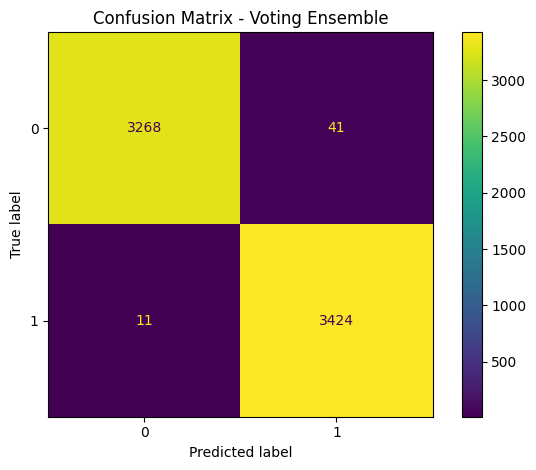

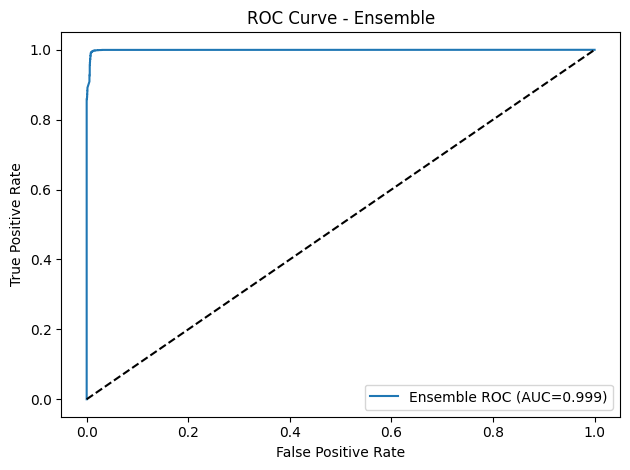

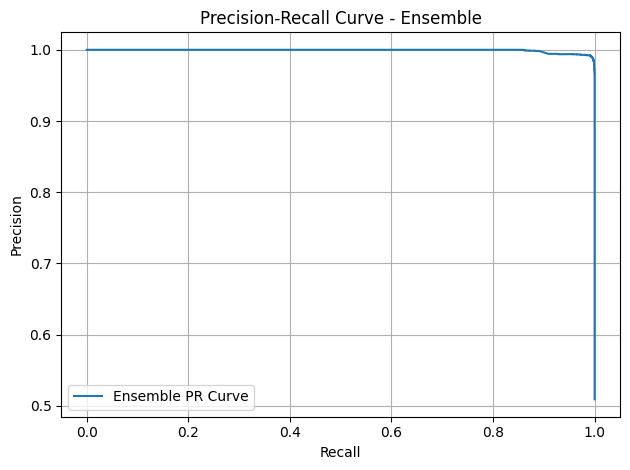


Total runtime: 324.37 seconds (5 minutes 24.37 seconds)
Achieved F1 (Ensemble) = 0.992. Target met
✅ Stored results for Ziming_Ensemble


In [ ]:
#example

# Reproducibility seeds
os.environ['PYTHONHASHSEED'] = '42'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

start_time = time.time()

# Data Prep
df['Message'] = df['Message'].astype(str).str.lower().apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df['Spam/Ham'] = df['Spam/Ham'].map({'ham': 0, 'spam': 1})

# 🔹 Fix: Drop rows with missing labels, and fill missing messages
df = df.dropna(subset=['Spam/Ham'])
df['Message'] = df['Message'].fillna("")

X = df['Message'].values
y = df['Spam/Ham'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



#...........................................................................................................................................................

# -----------------------------
# TF-IDF features for NB / ExtraTrees
# -----------------------------
tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1, 2),
    sublinear_tf=True
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# -----------------------------
# Utility functions
# -----------------------------
def count_parameters(model):
    """Count parameters for sklearn or keras models."""
    try:  # keras/tf models
        return model.count_params()
    except Exception:
        try:  # sklearn models
            return getattr(model, 'n_features_in_', 'N/A')
        except Exception:
            return "N/A"


def measure_inference_time(model, X_sample, model_type='sklearn'):
    """Measure avg inference time in milliseconds."""
    import time
    runs = 30
    start = time.time()
    for _ in range(runs):
        if model_type == 'keras':
            _ = model.predict(X_sample, verbose=0)
        else:
            _ = model.predict(X_sample)
    end = time.time()
    return ((end - start) / runs) * 1000  # ms

# -----------------------------
# Main Model: Naive Bayes (Multinomial)
# -----------------------------
nb = MultinomialNB(alpha=0.1)
nb.fit(X_train_tfidf, y_train)

# -----------------------------
# Extra Trees
# -----------------------------
et = ExtraTreesClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    max_features='sqrt'
)
et.fit(X_train_tfidf, y_train)

# -----------------------------
# Word-level CNN
# -----------------------------
tf.random.set_seed(42)
max_words = 20000
max_len = 80

tok = Tokenizer(num_words=max_words, oov_token="<unk>")
tok.fit_on_texts(X_train)

X_train_seq = pad_sequences(tok.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tok.texts_to_sequences(X_test), maxlen=max_len)

cnn = Sequential([
    Embedding(input_dim=max_words, output_dim=32, input_length=max_len),
    Conv1D(32, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_seq, y_train, epochs=3, batch_size=256, validation_split=0.1, verbose=0)

# -----------------------------
# Char-CNN
# -----------------------------
char_vocab = ['<pad>'] + list('abcdefghijklmnopqrstuvwxyz0123456789 ')
char2idx = {c: i for i, c in enumerate(char_vocab)}
max_char_len = 150

def text_to_char_seq(texts):
    arr = np.zeros((len(texts), max_char_len), dtype=np.int32)
    for i, t in enumerate(texts):
        t = t[:max_char_len]
        idxs = [char2idx.get(ch, char2idx[' ']) for ch in t]
        arr[i, :len(idxs)] = idxs
    return arr

X_train_char = text_to_char_seq(X_train)
X_test_char = text_to_char_seq(X_test)

inp_c = Input(shape=(max_char_len,))
emb_c = Embedding(input_dim=len(char_vocab), output_dim=32, input_length=max_char_len)(inp_c)
conv_c = Conv1D(64, 7, activation='relu')(emb_c)
pool_c = GlobalMaxPooling1D()(conv_c)
drop_c = Dropout(0.3)(pool_c)
fc_c = Dense(32, activation='relu')(drop_c)
out_c = Dense(1, activation='sigmoid')(fc_c)

char_cnn = Model(inp_c, out_c)
char_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
char_cnn.fit(X_train_char, y_train, epochs=3, batch_size=256, validation_split=0.1, verbose=0)

# -----------------------------
# Bidirectional LSTM
# -----------------------------
max_lstm_len = 60
X_train_lstm = pad_sequences(tok.texts_to_sequences(X_train), maxlen=max_lstm_len)
X_test_lstm = pad_sequences(tok.texts_to_sequences(X_test), maxlen=max_lstm_len)

bilstm = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_lstm_len, mask_zero=True),
    Bidirectional(LSTM(24, dropout=0.3, recurrent_dropout=0.3)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
bilstm.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Training Bidirectional LSTM...")
bilstm.fit(X_train_lstm, y_train, epochs=3, batch_size=256, validation_split=0.15, verbose=1)

# -----------------------------
# Predictions
# -----------------------------
nb_pred = nb.predict(X_test_tfidf)
nb_proba = nb.predict_proba(X_test_tfidf)[:, 1]

et_pred = et.predict(X_test_tfidf)
et_proba = et.predict_proba(X_test_tfidf)[:, 1]

cnn_proba = cnn.predict(X_test_seq, verbose=0).ravel()
cnn_pred = (cnn_proba >= 0.5).astype(int)

charcnn_proba = char_cnn.predict(X_test_char, verbose=0).ravel()
charcnn_pred = (charcnn_proba >= 0.5).astype(int)

bilstm_proba = bilstm.predict(X_test_lstm, verbose=0).ravel()
bilstm_pred = (bilstm_proba >= 0.5).astype(int)

# -----------------------------
# Ensemble (Soft Voting)
# -----------------------------
proba_list = [nb_proba, et_proba, cnn_proba, charcnn_proba, bilstm_proba]
ensemble_soft_no_rf_proba = np.mean(proba_list, axis=0)
ensemble_soft_no_rf_pred = (ensemble_soft_no_rf_proba >= 0.5).astype(int)

# -----------------------------
# Evaluation
# -----------------------------
models_results = []

# Naive Bayes
nb_acc = accuracy_score(y_test, nb_pred)
nb_prec = precision_score(y_test, nb_pred)
nb_rec = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)
nb_auc = roc_auc_score(y_test, nb_proba)
nb_params = count_parameters(nb)
nb_inference = measure_inference_time(nb, X_test_tfidf[:100])
models_results.append(['Naive Bayes', nb_acc, nb_prec, nb_rec, nb_f1, nb_auc, nb_params, nb_inference])

# Extra Trees
et_acc = accuracy_score(y_test, et_pred)
et_prec = precision_score(y_test, et_pred)
et_rec = recall_score(y_test, et_pred)
et_f1 = f1_score(y_test, et_pred)
et_auc = roc_auc_score(y_test, et_proba)
et_params = count_parameters(et)
et_inference = measure_inference_time(et, X_test_tfidf[:100])
models_results.append(['Extra Trees', et_acc, et_prec, et_rec, et_f1, et_auc, et_params, et_inference])

# CNN
cnn_acc = accuracy_score(y_test, cnn_pred)
cnn_prec = precision_score(y_test, cnn_pred)
cnn_rec = recall_score(y_test, cnn_pred)
cnn_f1 = f1_score(y_test, cnn_pred)
cnn_auc = roc_auc_score(y_test, cnn_proba)
cnn_params = cnn.count_params()
cnn_inference = measure_inference_time(cnn, X_test_seq[:100], 'keras')
models_results.append(['CNN', cnn_acc, cnn_prec, cnn_rec, cnn_f1, cnn_auc, cnn_params, cnn_inference])

# CharCNN
charcnn_acc = accuracy_score(y_test, charcnn_pred)
charcnn_prec = precision_score(y_test, charcnn_pred)
charcnn_rec = recall_score(y_test, charcnn_pred)
charcnn_f1 = f1_score(y_test, charcnn_pred)
charcnn_auc = roc_auc_score(y_test, charcnn_proba)
charcnn_params = char_cnn.count_params()
charcnn_inference = measure_inference_time(char_cnn, X_test_char[:100], 'keras')
models_results.append(['CharCNN', charcnn_acc, charcnn_prec, charcnn_rec, charcnn_f1, charcnn_auc, charcnn_params, charcnn_inference])

# BiLSTM
bilstm_acc = accuracy_score(y_test, bilstm_pred)
bilstm_prec = precision_score(y_test, bilstm_pred)
bilstm_rec = recall_score(y_test, bilstm_pred)
bilstm_f1 = f1_score(y_test, bilstm_pred)
bilstm_auc = roc_auc_score(y_test, bilstm_proba)
bilstm_params = bilstm.count_params()
bilstm_inference = measure_inference_time(bilstm, X_test_lstm[:100], 'keras')
models_results.append(['BiLSTM', bilstm_acc, bilstm_prec, bilstm_rec, bilstm_f1, bilstm_auc, bilstm_params, bilstm_inference])

# Ensemble
ensemble_acc = accuracy_score(y_test, ensemble_soft_no_rf_pred)
ensemble_prec = precision_score(y_test, ensemble_soft_no_rf_pred)
ensemble_rec = recall_score(y_test, ensemble_soft_no_rf_pred)
ensemble_f1 = f1_score(y_test, ensemble_soft_no_rf_pred)
ensemble_auc = roc_auc_score(y_test, ensemble_soft_no_rf_proba)
ensemble_params = "Combined"
ensemble_inference = nb_inference + et_inference + cnn_inference + charcnn_inference + bilstm_inference
models_results.append(['Voting Ensemble (NB+ET+CNN+CharCNN+BiLSTM)', ensemble_acc, ensemble_prec, ensemble_rec, ensemble_f1, ensemble_auc, ensemble_params, ensemble_inference])

# -----------------------------
# Print Results
# -----------------------------
print("\n" + "="*140)
print("MODEL EVALUATION TABLE: Accuracy, Precision, Recall, F1, AUC, Parameters, Inference Time")
print("="*140)
print(f"{'Model':<45} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10} {'AUC':<10} {'Params':<15} {'Inference(ms)':<12}")
print("-"*140)

for model_name, acc, prec, rec, f1, auc, params, inf in models_results:
    if isinstance(params, (int, float)):
        params_str = f"{params:,}" if params != 0 else "N/A"
    else:
        params_str = str(params)
    if isinstance(inf, (int, float)) and inf > 0:
        inf_str = f"{inf:.2f}"
    else:
        inf_str = "N/A"
    print(f"{model_name:<45} {acc:<10.3f} {prec:<10.3f} {rec:<10.3f} {f1:<10.3f} {auc:<10.3f} {params_str:<15} {inf_str:<12}")

print("="*140)

# -----------------------------
# Confusion Matrix
# -----------------------------
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix(y_test, ensemble_soft_no_rf_pred)).plot()
plt.title('Confusion Matrix - Voting Ensemble')
plt.tight_layout()
plt.show()

# -----------------------------
# ROC Curve
# -----------------------------
fpr, tpr, _ = roc_curve(y_test, ensemble_soft_no_rf_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Ensemble ROC (AUC={ensemble_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ensemble')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# -----------------------------
# Precision-Recall Curve
# -----------------------------
precision, recall, _ = precision_recall_curve(y_test, ensemble_soft_no_rf_proba)
plt.figure()
plt.plot(recall, precision, label=f'Ensemble PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Ensemble')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------
# Runtime
# -----------------------------
time_taken = time.time() - start_time
minutes = int(time_taken // 60)
seconds = time_taken % 60
print(f"\nTotal runtime: {time_taken:.2f} seconds ({minutes} minutes {seconds:.2f} seconds)")

# -----------------------------
# Final Verdict
# -----------------------------
target_f1 = 0.98
print(f"Achieved F1 (Ensemble) = {ensemble_f1:.3f}. {'Target met' if ensemble_f1 >= target_f1 else 'Target not met'}")









#=======================================================================================================================================================================================================================================================================================================================================================================================





# === STORE RESULTS FOR ZIMING CODE ===

# Step 1: Grab predictions and labels
y_test_ziming = y_test          # ground truth
y_pred_ziming = bilstm_pred     # Ziming's BiLSTM predicted labels
y_proba_ziming = bilstm_proba   # Ziming's BiLSTM probabilities
model_name_ziming = "Ziming_Ensemble"

# Step 2: Define collector function
def store_results(name, y_true, y_pred, y_proba, file_path="all_models_results.pkl"):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    results = {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ROC_AUC": roc_auc_score(y_true, y_proba),
        "y_true": y_true,
        "y_pred": y_pred,
        "y_proba": y_proba
    }

    # Step 3: Append to file if exists, otherwise create new
    if os.path.exists(file_path):
        with open(file_path, "rb") as f:
            all_results = pickle.load(f)
    else:
        all_results = []

    all_results.append(results)

    # Step 4: Save back
    with open(file_path, "wb") as f:
        pickle.dump(all_results, f)

    print(f"✅ Stored results for {name}")

# Step 5: Actually store Ziming results
store_results(model_name_ziming, y_test_ziming, y_pred_ziming, y_proba_ziming)


# Lee Jing Wei Code

⏳ Step 1/8: Loading dataset...
✅ Dataset loaded! Shape: (33716, 5)

⏳ Step 2/8: Cleaning dataset and adding features...
✅ Features ready!

⏳ Step 3/8: Splitting dataset (80% train / 20% test)...
✅ Split complete! Train: 26972, Test: 6744

⏳ Step 4/8: Creating TF-IDF features...
✅ TF-IDF done!

⏳ Step 5/8: Scaling numeric features and combining with TF-IDF...
✅ Combined feature shape: (26972, 10003)

⏳ Step 6/8: Training base classifiers...

🔹 Training KNN...
✅ KNN done!

🔹 Training RandomForest...
✅ RandomForest done!

🔹 Training MLP...
✅ MLP done!

⏳ Step 7/8: Training meta-learner (Decision Tree)...
✅ Meta-learner trained!

⏳ Step 8/8: Evaluating stacking ensemble...


📊 Stacking Ensemble Results:
──────────────────────────────
🎯 Accuracy : 0.9755
💡 Precision: 0.9770
🔔 Recall   : 0.9750
⚖️ F1-Score : 0.9760
📈 ROC-AUC  : 0.9920
──────────────────────────────



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


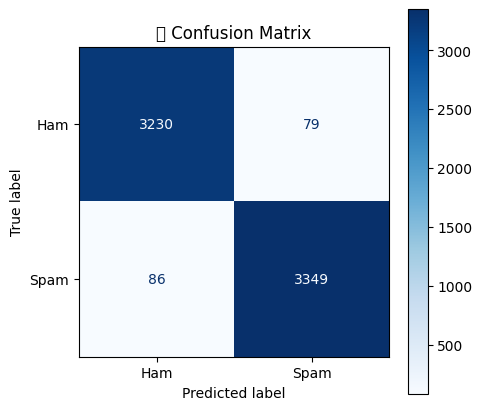

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


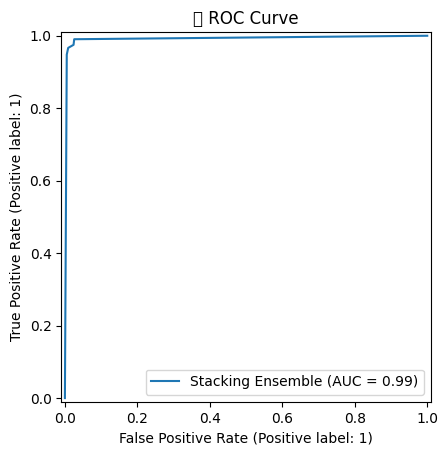

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


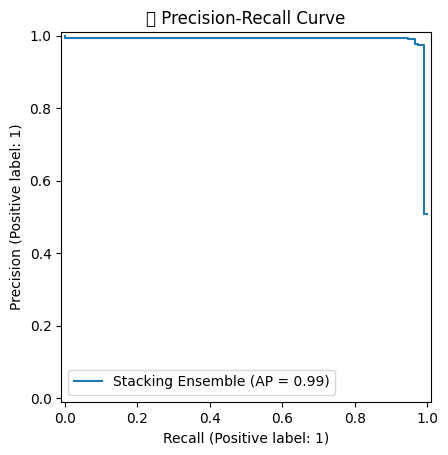

✅ Stored results for Jingwei_Ensemble

⏱ Total runtime: 234.31 seconds (3 minutes 54.31 seconds)


In [ ]:

start_time_total = time.time()
#JWMOdel
# ===== REPRODUCIBILITY =====
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# ===== 1. LOAD DATASET =====
print("⏳ Step 1/8: Loading dataset...")
df = pd.read_csv('enron_data/enron_spam_data.csv')
print(f"✅ Dataset loaded! Shape: {df.shape}\n")

# ===== 2. CLEAN & FEATURE ENGINEERING =====
print("⏳ Step 2/8: Cleaning dataset and adding features...")
df['Message'] = df['Message'].astype(str).str.lower()
df['Message'] = df['Message'].apply(lambda x: re.sub(r'[^a-z0-9\s]', ' ', x))
df['label'] = df['Spam/Ham'].map({'ham':0, 'spam':1})

# Numeric features
df['email_len'] = df['Message'].apply(len)
df['num_digits'] = df['Message'].apply(lambda x: sum(c.isdigit() for c in x))
df['num_special'] = df['Message'].apply(lambda x: sum(not c.isalnum() and not c.isspace() for c in x))
print("✅ Features ready!\n")

# ===== 3. TRAIN-TEST SPLIT =====
print("⏳ Step 3/8: Splitting dataset (80% train / 20% test)...")
X_text = df['Message'].values
X_numeric = df[['email_len','num_digits','num_special']].values
y = df['label'].values

X_train_text, X_test_text, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, stratify=y, random_state=SEED
)
print(f"✅ Split complete! Train: {len(y_train)}, Test: {len(y_test)}\n")

# ===== 4. TF-IDF FEATURES =====
print("⏳ Step 4/8: Creating TF-IDF features...")
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)
print("✅ TF-IDF done!\n")

# ===== 5. COMBINE TF-IDF + NUMERIC FEATURES =====
print("⏳ Step 5/8: Scaling numeric features and combining with TF-IDF...")
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_combined = hstack([X_train_tfidf, X_train_num_scaled])
X_test_combined  = hstack([X_test_tfidf, X_test_num_scaled])
print(f"✅ Combined feature shape: {X_train_combined.shape}\n")

# ===== 6. TRAIN BASE MODELS =====
print("⏳ Step 6/8: Training base classifiers...\n")
base_models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=SEED),
    'MLP': MLPClassifier(hidden_layer_sizes=(64,32), max_iter=50, random_state=SEED)
}

train_meta_features = []
test_meta_features = []

for name, model in base_models.items():
    print(f"🔹 Training {name}...")
    model.fit(X_train_combined, y_train)
    train_meta_features.append(model.predict_proba(X_train_combined)[:,1])
    test_meta_features.append(model.predict_proba(X_test_combined)[:,1])
    print(f"✅ {name} done!\n")

# ===== 7. STACKING: DECISION TREE =====
print("⏳ Step 7/8: Training meta-learner (Decision Tree)...")
X_meta_train = np.vstack(train_meta_features).T
X_meta_test  = np.vstack(test_meta_features).T

meta_learner = DecisionTreeClassifier(max_depth=5, random_state=SEED)
meta_learner.fit(X_meta_train, y_train)
print("✅ Meta-learner trained!\n")

# ===== 8. EVALUATION =====
print("⏳ Step 8/8: Evaluating stacking ensemble...\n")
y_pred = meta_learner.predict(X_meta_test)
y_proba = meta_learner.predict_proba(X_meta_test)[:,1]

# Fancy table metrics
metrics_table = f"""
📊 Stacking Ensemble Results:
──────────────────────────────
🎯 Accuracy : {accuracy_score(y_test, y_pred):.4f}
💡 Precision: {precision_score(y_test, y_pred):.4f}
🔔 Recall   : {recall_score(y_test, y_pred):.4f}
⚖️ F1-Score : {f1_score(y_test, y_pred):.4f}
📈 ROC-AUC  : {roc_auc_score(y_test, y_proba):.4f}
──────────────────────────────
"""
print(metrics_table)

# ===== VISUALIZATIONS =====
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham','Spam'])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("📊 Confusion Matrix")
plt.show()

# ROC Curve
roc_disp = RocCurveDisplay.from_predictions(y_test, y_proba, name="Stacking Ensemble")
plt.title("📈 ROC Curve")
plt.show()

# Precision-Recall Curve
pr_disp = PrecisionRecallDisplay.from_predictions(y_test, y_proba, name="Stacking Ensemble")
plt.title("📉 Precision-Recall Curve")
plt.show()









#============#===#=========#=========================================================================================#================================================================================#======================================================================================#=============================================================================#


# === STORE RESULTS FOR JINGWEI CODE ===


y_test_jingwei = y_test
y_pred_jingwei = y_pred
y_proba_jingwei = y_proba
model_name_jingwei = "Jingwei_Ensemble"

def store_results(name, y_true, y_pred, y_proba, file_path="all_models_results.pkl"):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    results = {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ROC_AUC": roc_auc_score(y_true, y_proba),
        "y_true": y_true,
        "y_pred": y_pred,
        "y_proba": y_proba
    }
    if os.path.exists(file_path):
        with open(file_path, "rb") as f:
            all_results = pickle.load(f)
    else:
        all_results = []
    all_results.append(results)
    with open(file_path, "wb") as f:
        pickle.dump(all_results, f)
    print(f"✅ Stored results for {name}")

store_results(model_name_jingwei, y_test_jingwei, y_pred_jingwei, y_proba_jingwei)

# ===== TOTAL TIME TAKEN =====
end_time_total = time.time()
total_time = end_time_total - start_time_total
minutes = int(total_time // 60)
seconds = total_time % 60
print(f"\n⏱ Total runtime: {total_time:.2f} seconds ({minutes} minutes {seconds:.2f} seconds)")





#=======================================================================================================================================================================================================================================================================================================================================================================================


# Ahmad Code


Dataset loaded: (33716, 5)
Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


95/95 - 3s - 34ms/step - accuracy: 0.7909 - loss: 0.5655 - val_accuracy: 0.9096 - val_loss: 0.3734
Epoch 2/3
95/95 - 1s - 6ms/step - accuracy: 0.9422 - loss: 0.2438 - val_accuracy: 0.9600 - val_loss: 0.1604
Epoch 3/3
95/95 - 0s - 3ms/step - accuracy: 0.9626 - loss: 0.1369 - val_accuracy: 0.9692 - val_loss: 0.1110

MODEL EVALUATION TABLE: Accuracy, Precision, Recall, F1, Params, Inference Time
Model                               Accuracy   Precision  Recall     F1         Params     Inference (ms) 
------------------------------------------------------------------------------------------------------------------------
Extra Trees                         0.98       0.98       0.99       0.99       10000      219.30         
SGD Classifier                      0.98       0.97       0.99       0.98       10001      2.54           
Bernoulli Naive Bayes               0.94       0.90       0.99       0.94       3000       5.92           
Fast Neural Network                 0.97       0.96    

<Figure size 600x500 with 0 Axes>

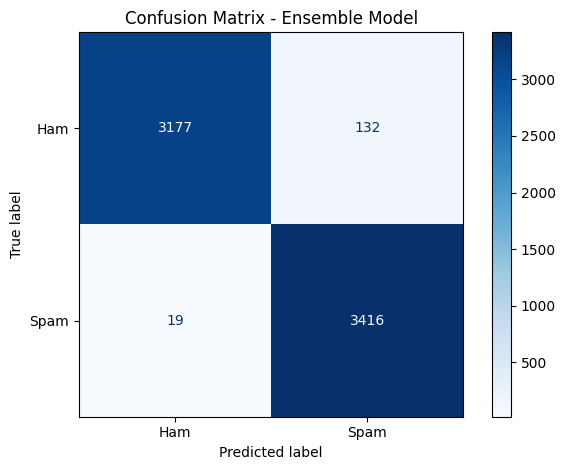

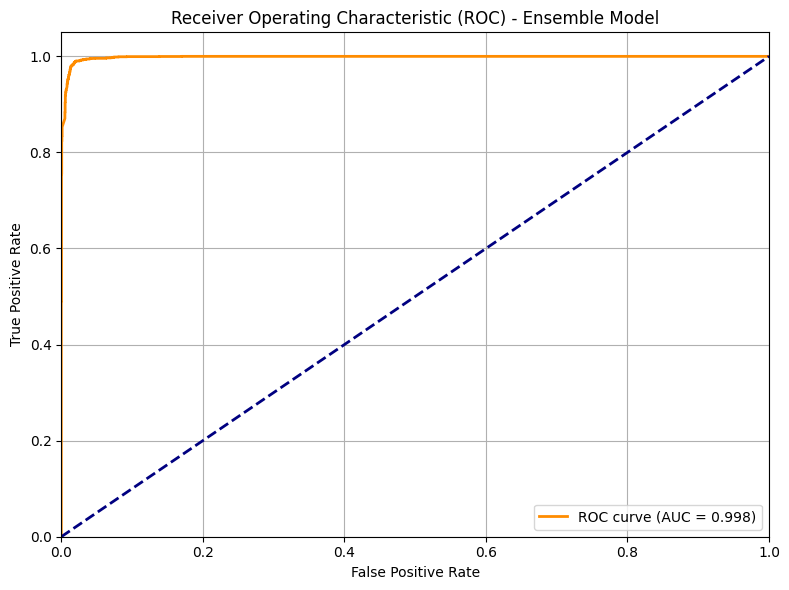

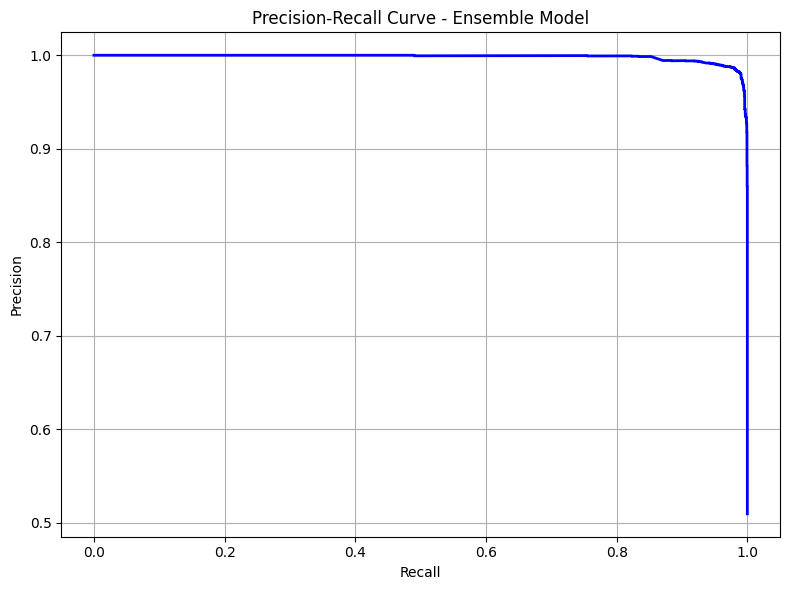

In [5]:
# === REPRODUCIBILITY: Fix all random seeds ===
os.environ['PYTHONHASHSEED'] = '42'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Load dataset
csv_files = [f for f in os.listdir('enron_data') if f.endswith('.csv')]
df = pd.read_csv(f'enron_data/{csv_files[0]}')

print(f"Dataset loaded: {df.shape}")

# Data preprocessing
df['Message'] = df['Message'].astype(str).str.lower().apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df['Spam/Ham'] = df['Spam/Ham'].map({'ham': 0, 'spam': 1})
X = df['Message'].values
y = df['Spam/Ham'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Start timing
start_time = time.time()

# Tokenization for neural network
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

# Fast Neural Network
model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(
    X_train_seq, y_train,
    batch_size=256,
    epochs=3,
    validation_split=0.1,
    verbose=2
)

proba_nn = model.predict(X_test_seq, verbose=0).flatten()

# TF-IDF features
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Count Vectorizer for Bernoulli NB
count_vectorizer = CountVectorizer(max_features=3000, binary=True)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Extra Trees Classifier
et = ExtraTreesClassifier(n_estimators=50, random_state=42, n_jobs=-1)
et.fit(X_train_tfidf, y_train)
proba_et = et.predict_proba(X_test_tfidf)[:, 1]

# SGD Classifier
sgd = SGDClassifier(loss='log_loss', random_state=42, max_iter=1000)
sgd.fit(X_train_tfidf, y_train)
sgd_scores = sgd.decision_function(X_test_tfidf)
proba_sgd = 1 / (1 + np.exp(-sgd_scores))

# Bernoulli Naive Bayes
bnb = BernoulliNB(alpha=1.0)
bnb.fit(X_train_count, y_train)
proba_bnb = bnb.predict_proba(X_test_count)[:, 1]

# Logistic Regression (additional model like your friend's code)
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_tfidf, y_train)
proba_lr = lr.predict_proba(X_test_tfidf)[:, 1]

# Function to calculate model parameters count
def count_parameters(model, model_type='sklearn'):
    if model_type == 'keras':
        return model.count_params()
    elif hasattr(model, 'coef_'):
        return model.coef_.size + 1
    elif hasattr(model, 'n_features_in_'):
        return model.n_features_in_
    else:
        return "N/A"

# Function to measure inference time
def measure_inference_time(model, X_test_data, model_type='sklearn'):
    start_time_inf = time.time()
    if model_type == 'sklearn':
        model.predict(X_test_data)
    elif model_type == 'keras':
        model.predict(X_test_data, verbose=0)
    end_time_inf = time.time()
    return (end_time_inf - start_time_inf) * 1000

# Generate predictions for individual models
et_pred = (proba_et > 0.5).astype(int)
sgd_pred = (proba_sgd > 0.5).astype(int)
bnb_pred = (proba_bnb > 0.5).astype(int)
nn_pred = (proba_nn > 0.5).astype(int)
lr_pred = (proba_lr > 0.5).astype(int)

# Ensemble predictions
ensemble_soft_proba = (proba_et + proba_sgd + proba_bnb + proba_nn) / 4
ensemble_soft_pred = (ensemble_soft_proba > 0.5).astype(int)

# Calculate comprehensive metrics for all models
models_results = []

# Extra Trees
et_acc = accuracy_score(y_test, et_pred)
et_prec = precision_score(y_test, et_pred)
et_rec = recall_score(y_test, et_pred)
et_f1 = f1_score(y_test, et_pred)
et_params = count_parameters(et)
et_inference = measure_inference_time(et, X_test_tfidf, 'sklearn')
models_results.append(['Extra Trees', et_acc, et_prec, et_rec, et_f1, et_params, et_inference])

# SGD Classifier
sgd_acc = accuracy_score(y_test, sgd_pred)
sgd_prec = precision_score(y_test, sgd_pred)
sgd_rec = recall_score(y_test, sgd_pred)
sgd_f1 = f1_score(y_test, sgd_pred)
sgd_params = count_parameters(sgd)
sgd_inference = measure_inference_time(sgd, X_test_tfidf, 'sklearn')
models_results.append(['SGD Classifier', sgd_acc, sgd_prec, sgd_rec, sgd_f1, sgd_params, sgd_inference])

# Bernoulli Naive Bayes
bnb_acc = accuracy_score(y_test, bnb_pred)
bnb_prec = precision_score(y_test, bnb_pred)
bnb_rec = recall_score(y_test, bnb_pred)
bnb_f1 = f1_score(y_test, bnb_pred)
bnb_params = count_parameters(bnb)
bnb_inference = measure_inference_time(bnb, X_test_count, 'sklearn')
models_results.append(['Bernoulli Naive Bayes', bnb_acc, bnb_prec, bnb_rec, bnb_f1, bnb_params, bnb_inference])

# Fast Neural Network
nn_acc = accuracy_score(y_test, nn_pred)
nn_prec = precision_score(y_test, nn_pred)
nn_rec = recall_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_params = count_parameters(model, 'keras')
nn_inference = measure_inference_time(model, X_test_seq, 'keras')
models_results.append(['Fast Neural Network', nn_acc, nn_prec, nn_rec, nn_f1, nn_params, nn_inference])

# Logistic Regression
lr_acc = accuracy_score(y_test, lr_pred)
lr_prec = precision_score(y_test, lr_pred)
lr_rec = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_params = count_parameters(lr)
lr_inference = measure_inference_time(lr, X_test_tfidf, 'sklearn')
models_results.append(['Logistic Regression (TF-IDF)', lr_acc, lr_prec, lr_rec, lr_f1, lr_params, lr_inference])

# Ensemble
ensemble_acc = accuracy_score(y_test, ensemble_soft_pred)
ensemble_prec = precision_score(y_test, ensemble_soft_pred)
ensemble_rec = recall_score(y_test, ensemble_soft_pred)
ensemble_f1 = f1_score(y_test, ensemble_soft_pred)
ensemble_params = "Combined"
ensemble_inference = et_inference + sgd_inference + bnb_inference + nn_inference
models_results.append(['Ensemble (ET+SGD+BNB+FastNN)', ensemble_acc, ensemble_prec, ensemble_rec, ensemble_f1, ensemble_params, ensemble_inference])

# Print comprehensive results table (like your friend's format)
print("\n" + "="*120)
print("MODEL EVALUATION TABLE: Accuracy, Precision, Recall, F1, Params, Inference Time")
print("="*120)
print(f"{'Model':<35} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10} {'Params':<10} {'Inference (ms)':<15}")
print("-"*120)

for model_name, acc, prec, rec, f1, params, inference in models_results:
    print(f"{model_name:<35} {acc:<10.2f} {prec:<10.2f} {rec:<10.2f} {f1:<10.2f} {str(params):<10} {inference:<15.2f}")

print("-"*120)
print("TF-IDF: Term Frequency-Inverse Document Frequency with N-grams (1-3)")
print("ET: Extra Trees Classifier")
print("SGD: Stochastic Gradient Descent Classifier")
print("BNB: Bernoulli Naive Bayes")
print("FastNN: Fast Neural Network with Global Average Pooling")
print("LR: Logistic Regression on TF-IDF features")
print("="*120)

time_taken = time.time() - start_time
minutes = int(time_taken // 60)
seconds = time_taken % 60
print(f"\nTotal runtime: {time_taken:.2f} seconds ({minutes} minutes {seconds:.2f} seconds)")

# Individual model performance
print(f"\nIndividual Model Accuracies:")
print(f"Extra Trees: {et_acc:.2f}")
print(f"SGD Classifier: {sgd_acc:.2f}")
print(f"Bernoulli NB: {bnb_acc:.2f}")
print(f"Fast Neural Net: {nn_acc:.2f}")
print(f"Logistic Regression: {lr_acc:.2f}")
print(f"ENSEMBLE: {ensemble_acc:.2f}")

# Final Accuracy Display
print("\n" + "="*50)
print("FINAL ENSEMBLE ACCURACY")
print("="*50)
print(f"Accuracy: {ensemble_acc:.2%}")
print(f"Accuracy: {ensemble_acc:.4f}")
print("="*50)

# === STORE RESULTS FOR AHMED CODE ===
y_test_ahmed = y_test
y_pred_ahmed = ensemble_soft_pred
y_proba_ahmed = ensemble_soft_proba
model_name_ahmed = "Ahmed_Ensemble"

def store_results(name, y_true, y_pred, y_proba, file_path="all_models_results.pkl"):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    results = {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ROC_AUC": roc_auc_score(y_true, y_proba),
        "y_true": y_true,
        "y_pred": y_pred,
        "y_proba": y_proba
    }
    if os.path.exists(file_path):
        with open(file_path, "rb") as f:
            all_results = pickle.load(f)
    else:
        all_results = []
    all_results.append(results)
    with open(file_path, "wb") as f:
        pickle.dump(all_results, f)
    print(f"✅ Stored results for {name}")

store_results(model_name_ahmed, y_test_ahmed, y_pred_ahmed, y_proba_ahmed)

# ======== VISUALIZATION: Confusion Matrix, ROC, and Precision-Recall Curves =========
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc

# Prepare data for ensemble visualization
y_true_ensemble = y_test
y_pred_ensemble = ensemble_soft_pred
y_proba_ensemble = ensemble_soft_proba

# 1. Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_true_ensemble, y_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Ensemble Model')
plt.tight_layout()
plt.show()

# 2. ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_true_ensemble, y_proba_ensemble)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Ensemble Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_true_ensemble, y_proba_ensemble)
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Ensemble Model')
plt.grid(True)
plt.tight_layout()
plt.show()

# Comparison and Graph


Model                Accuracy   Precision  Recall     F1         ROC_AUC   
----------------------------------------------------------------------------------------------------
Lazarus_Ensemble     0.9870     0.9802     0.9945     0.9873     0.9993    
Ziming_Ensemble      0.9815     0.9731     0.9910     0.9820     0.9985    
Jingwei_Ensemble     0.9755     0.9770     0.9750     0.9760     0.9920    
Ahmed_Ensemble       0.9776     0.9628     0.9945     0.9784     0.9982    


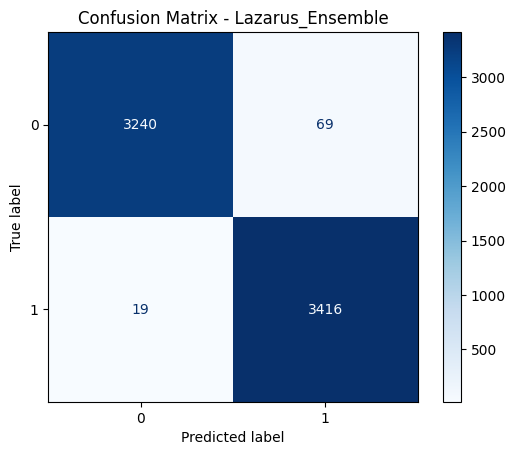

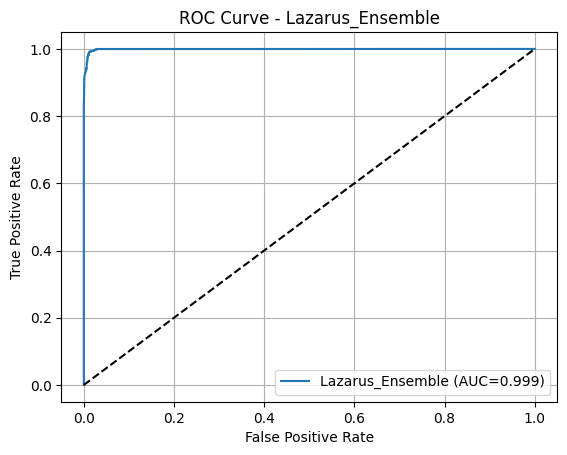

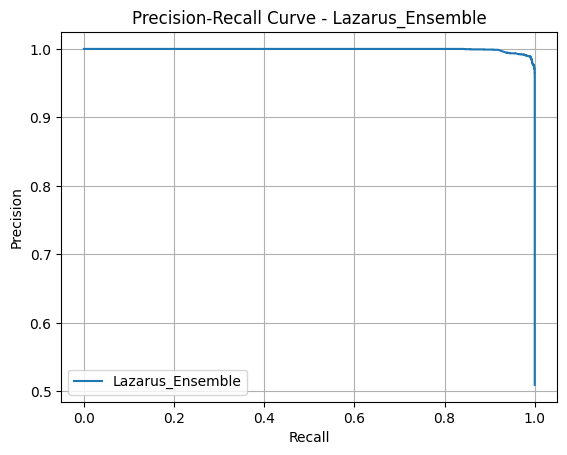

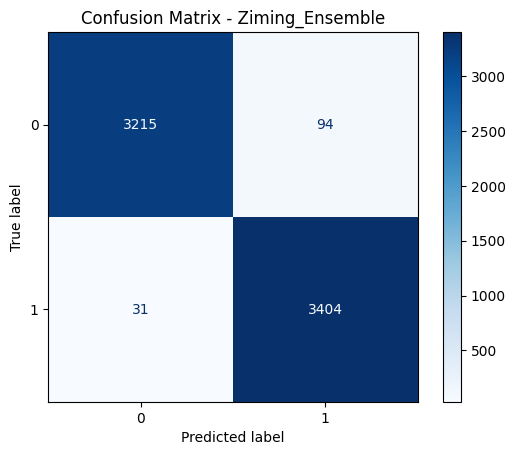

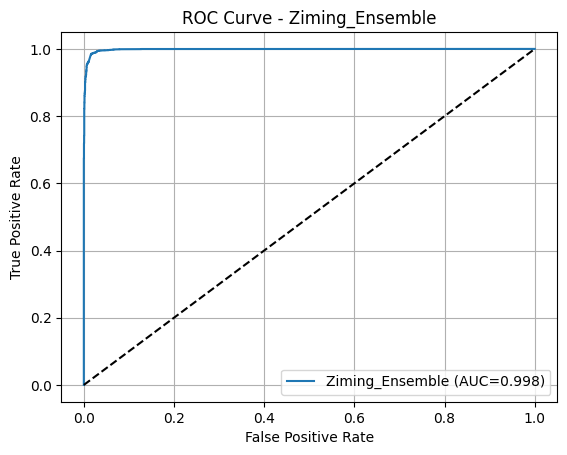

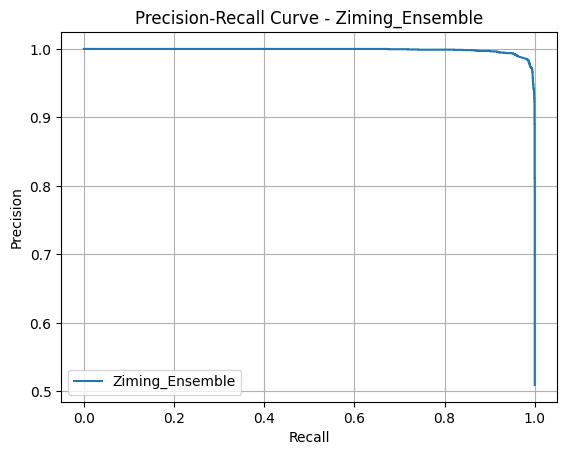

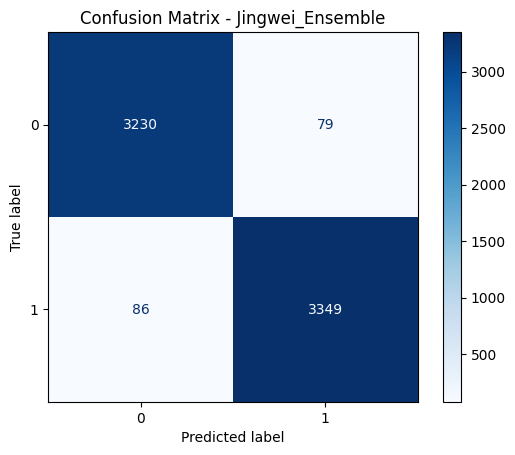

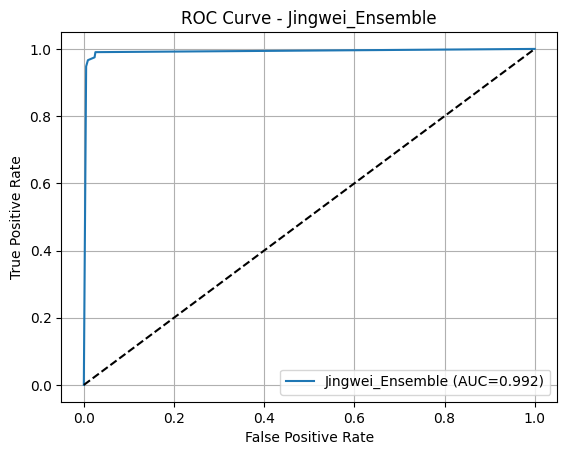

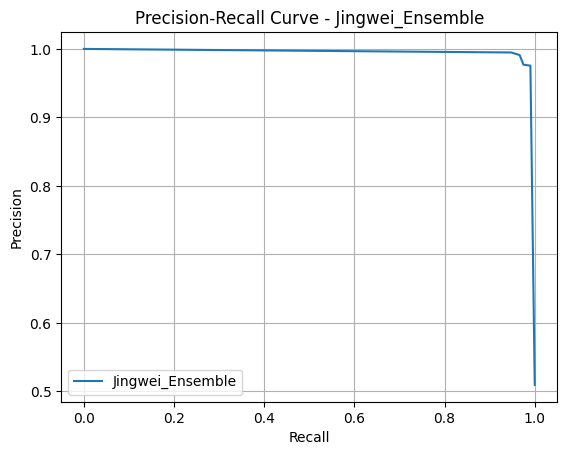

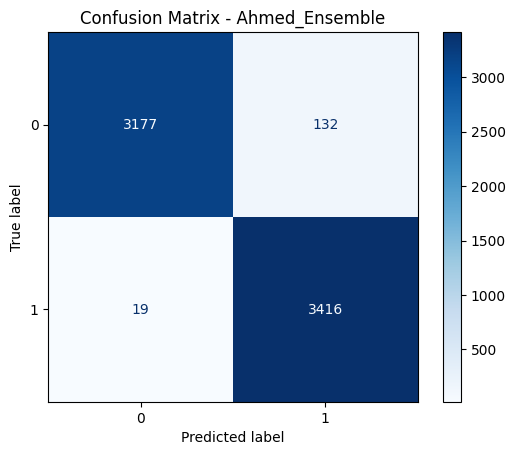

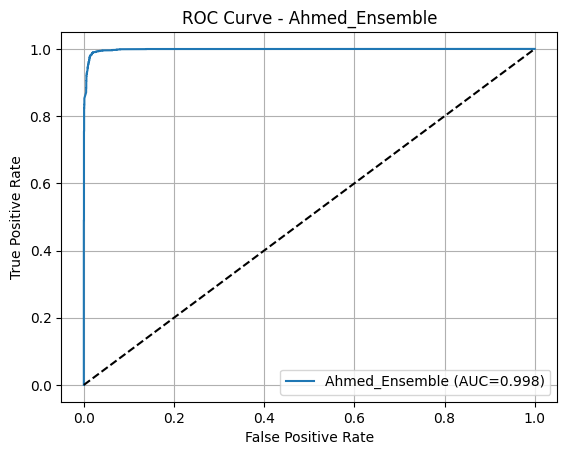

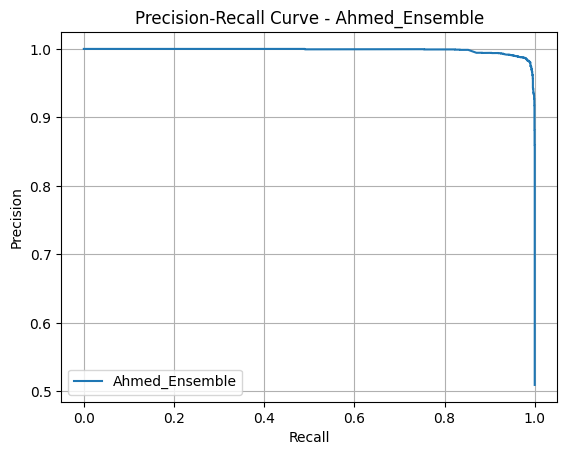

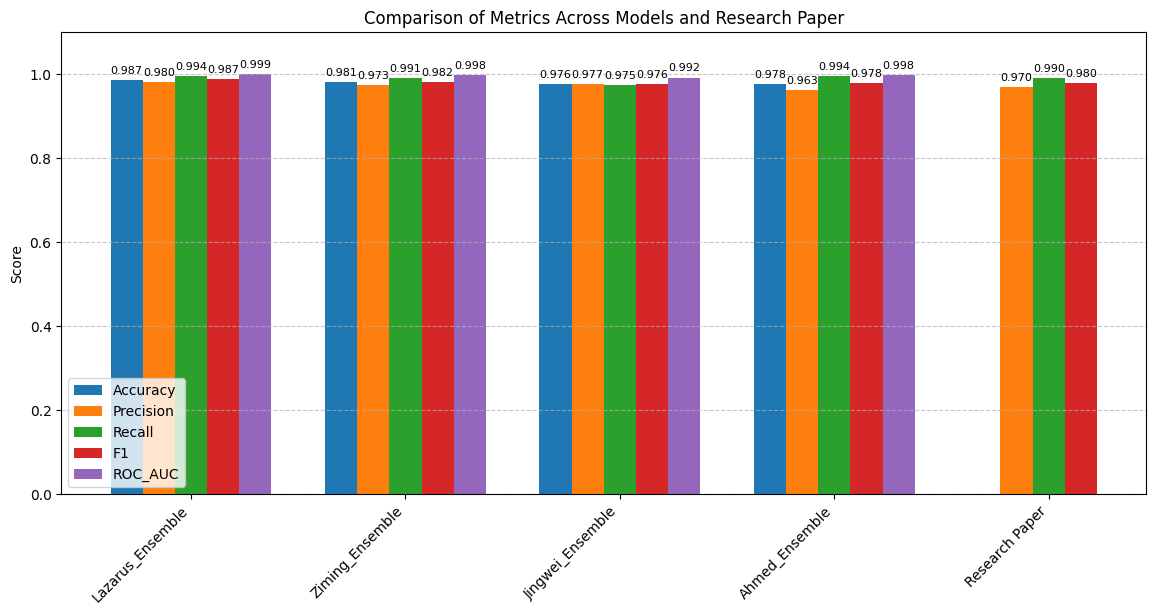


All results together (as a table):

           Model  Accuracy  Precision   Recall       F1  ROC_AUC
Lazarus_Ensemble  0.986951   0.980201 0.994469 0.987283 0.999265
 Ziming_Ensemble  0.981465   0.973128 0.990975 0.981970 0.998480
Jingwei_Ensemble  0.975534   0.976954 0.974964 0.975958 0.991984
  Ahmed_Ensemble  0.977610   0.962796 0.994469 0.978376 0.998232
  Research Paper       NaN   0.970000 0.990000 0.980000      NaN

HIGHEST F1 SCORE: 0.9873
MODEL ACHIEVING HIGHEST F1: Lazarus_Ensemble


In [ ]:


# Load all stored results
with open("all_models_results.pkl", "rb") as f:
    all_results = pickle.load(f)

# ===== 1. Print Comparison Table =====
print("\n" + "="*100)
print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10} {'ROC_AUC':<10}")
print("-"*100)
for res in all_results:
    print(f"{res['Model']:<20} {res['Accuracy']:<10.4f} {res['Precision']:<10.4f} {res['Recall']:<10.4f} {res['F1']:<10.4f} {res['ROC_AUC']:<10.4f}")
print("="*100)

# ===== 2. Plot Confusion Matrix, ROC, PR Curve per model =====
for res in all_results:
    name = res['Model']
    y_true = res['y_true']
    y_pred = res['y_pred']
    y_proba = res['y_proba']

    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc(fpr, tpr):.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    plt.figure()
    plt.plot(recall, precision, label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# ===== 3. Grouped Bar Chart for All Metrics (with Research Paper + Labels) =====
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']
model_names = [res['Model'] for res in all_results]

# Add Research Paper result (only Precision, Recall, F1 available)
research_paper_results = {
    'Model': 'Research Paper',
    'Accuracy': np.nan,
    'Precision': 0.97,
    'Recall': 0.99,
    'F1': 0.98,
    'ROC_AUC': np.nan
}
all_results.append(research_paper_results)
model_names.append("Research Paper")

# Build metric values
metric_values = [[res[m] for m in metrics_names] for res in all_results]

x = np.arange(len(model_names))
bar_width = 0.15

plt.figure(figsize=(14,6))
for i, metric in enumerate(metrics_names):
    values = [res[metric] for res in all_results]
    bars = plt.bar(x + i*bar_width, values, width=bar_width, label=metric)

    for bar, val in zip(bars, values):
        if not np.isnan(val):
            plt.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_height() + 0.01,
                f"{val:.3f}",
                ha='center', va='bottom', fontsize=8
            )

plt.xticks(x + bar_width*2, model_names, rotation=45, ha="right")
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Comparison of Metrics Across Models and Research Paper")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# ===== 4. Print all metrics in a table =====
print("\nAll results together (as a table):\n")
df_all_results = pd.DataFrame(all_results)
# Drop y_true, y_pred, y_proba for clean view
df_table = df_all_results.drop(columns=['y_true','y_pred','y_proba'], errors='ignore')
print(df_table.to_string(index=False))

# ===== 5. Print highest F1 score and which model =====
valid_results = [res for res in all_results if not np.isnan(res['F1'])]
max_f1_res = max(valid_results, key=lambda x: x['F1'])
print("\n" + "="*50)
print(f"HIGHEST F1 SCORE: {max_f1_res['F1']:.4f}")
print(f"MODEL ACHIEVING HIGHEST F1: {max_f1_res['Model']}")
print("="*50)
